<a href="https://colab.research.google.com/github/brijeshkushukla/regression-analysis/blob/main/NREGULARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
data.shape

(506, 13)

In [ ]:
target.shape

(506,)

In [ ]:
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
feature_num=7
X_test = data[:, :feature_num]
y = target
features = ['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE'] #feature_names[:feature_num]
X=pd.DataFrame(X_test, columns = features)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [ ]:
y[0:5]  #y ke upr array hai isliye slicing chlayenge,head ni chlega

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2
...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5


In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2
...,...,...,...,...,...,...,...
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3


In [ ]:
y_train

array([20.6, 23.1, 28. , 20. , 23.1, 25. ,  9.7, 23.9, 36.1, 13.4, 12.7,
       39.8, 10.4, 20.6, 17.8, 19.5, 23.7, 28.5, 24.3, 23.8, 19.1, 28.4,
       20.5, 33.8, 14.5, 20.4, 16. , 13.3, 30.8, 27.5, 24.4, 24.4, 25.1,
       43.8, 21.9, 26.2, 14.2, 20.8, 20.1, 23.1, 13.1, 16.2, 24.8, 20.2,
       22.5, 14.8, 28.7, 20.1, 23.4, 32. , 19.1, 50. , 20.9, 21.7, 22. ,
       17.2, 30.3, 12.3, 21.4, 20.5, 35.2, 19.6, 22. , 21.7, 14.1, 21.1,
       15. , 11.9, 20. , 41.3, 18.7, 50. , 50. , 18.4, 17.9, 28.1, 16.1,
       17.2, 28.6, 23.6, 20.4, 19.6, 18.8, 22.6, 17.7, 30.5, 18.2, 20.6,
       24.4, 17.3, 13.3, 22.8, 20.5, 21.2, 18.8, 18.9, 18.2, 23.1, 32.7,
       24. , 10.2, 19.5, 33.1, 13.4, 15.2, 24.8, 24.3,  9.5, 24.2, 18.5,
       44. , 50. , 24.7, 21.5,  8.4, 21.8, 50. , 23.8, 32.4, 24.4, 17.6,
       29.8,  9.6, 16.7, 13.8, 32. , 16.1,  8.3, 26.6, 14.3, 15. , 28.4,
       32.2, 17.1, 29.4, 10.4, 16.8, 31.5, 27.5, 46.7, 27.5, 17.2, 23.4,
       31.6, 13.8, 22. , 17. , 24.8, 24.3, 25.2, 21

In [ ]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9])

In [ ]:
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

different alpha values: [   10   100  1000 10000]


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_std,y_train)
print(regressor.intercept_)
print(regressor.coef_)

22.344591029023746
[-1.51817466  0.34298393 -0.67112706  1.09855488 -0.81259013  4.5358704
 -0.81931278]


In [ ]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train_std, y_train)
print(ridge.coef_)
print(ridge.intercept_)

[-1.49246448  0.37088936 -0.70836731  1.08568161 -0.80970633  4.4075122
 -0.80450999]
22.344591029023746


In [ ]:
ridge_weight = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

In [ ]:
ridge_weight

[array([-1.49246448,  0.37088936, -0.70836731,  1.08568161, -0.80970633,
         4.4075122 , -0.80450999]),
 array([-1.30486468,  0.5170331 , -0.85951603,  0.96594376, -0.81006847,
         3.54696735, -0.74796938]),
 array([-0.6486645 ,  0.4993468 , -0.67576213,  0.39800779, -0.61503278,
         1.33852138, -0.56022566]),
 array([-0.11842591,  0.11262874, -0.1443168 ,  0.05431575, -0.13553009,
         0.20563081, -0.12574102])]

In [ ]:
def weight_versus_alpha_plot(weight, alphas, features):

    fig = plt.figure(figsize = (8, 6))

    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)

    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

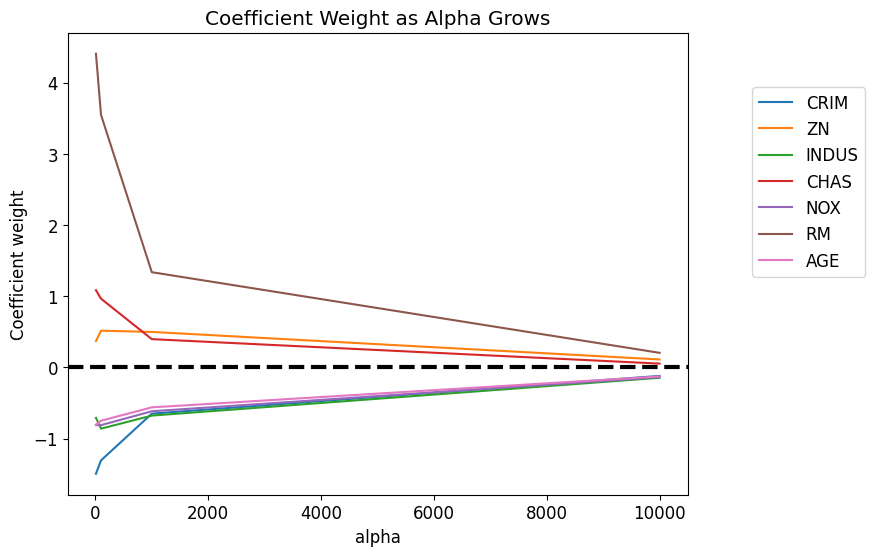

In [ ]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

In [ ]:
# new data on car

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarPrice_project (1).csv")

In [3]:
df.shape

(205, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.drop(columns=['car_ID'], axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:

df.describe()['price']

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<ipython-input-9-bf08f2ef1580>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color="y")


<Axes: xlabel='price', ylabel='Density'>

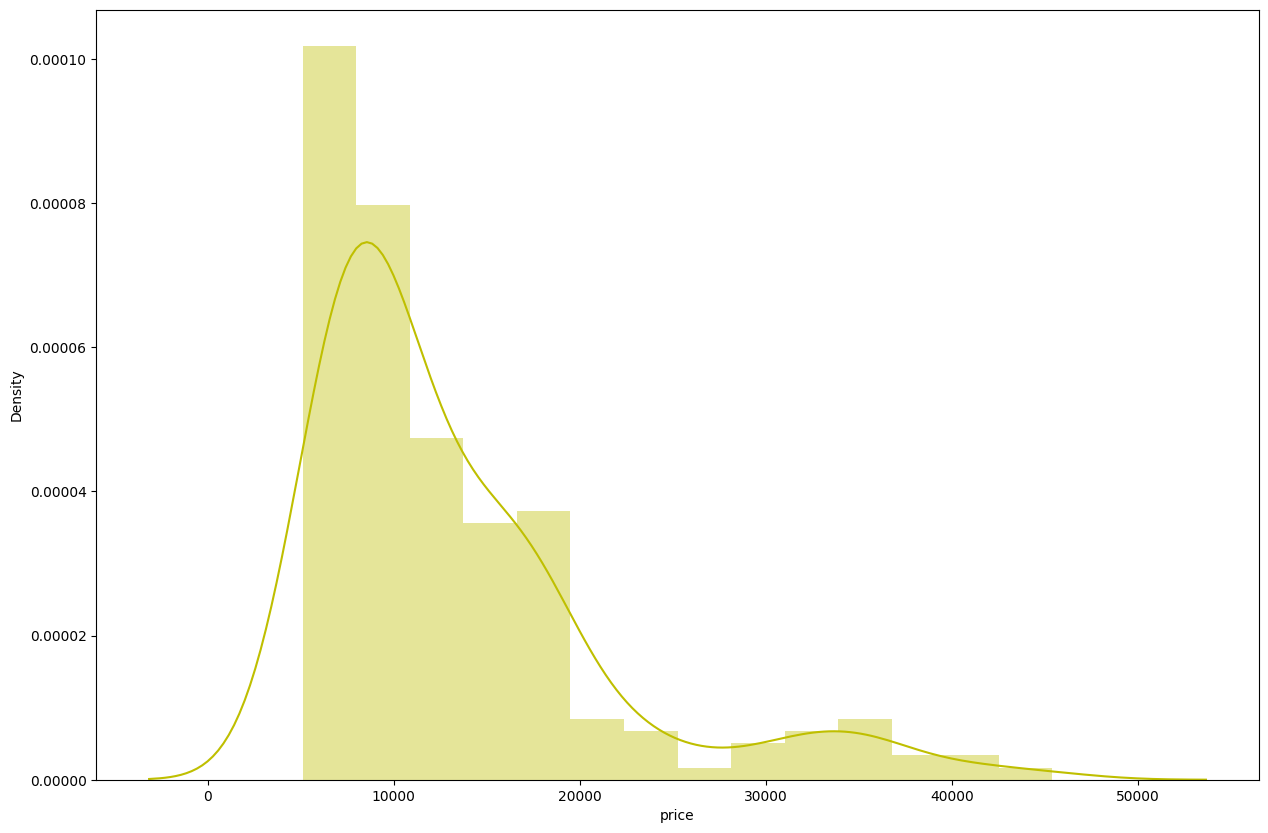

In [9]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['price'],color="y")

<ipython-input-10-cb1935c9d537>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['price']),color="y")


<Axes: xlabel='price', ylabel='Density'>

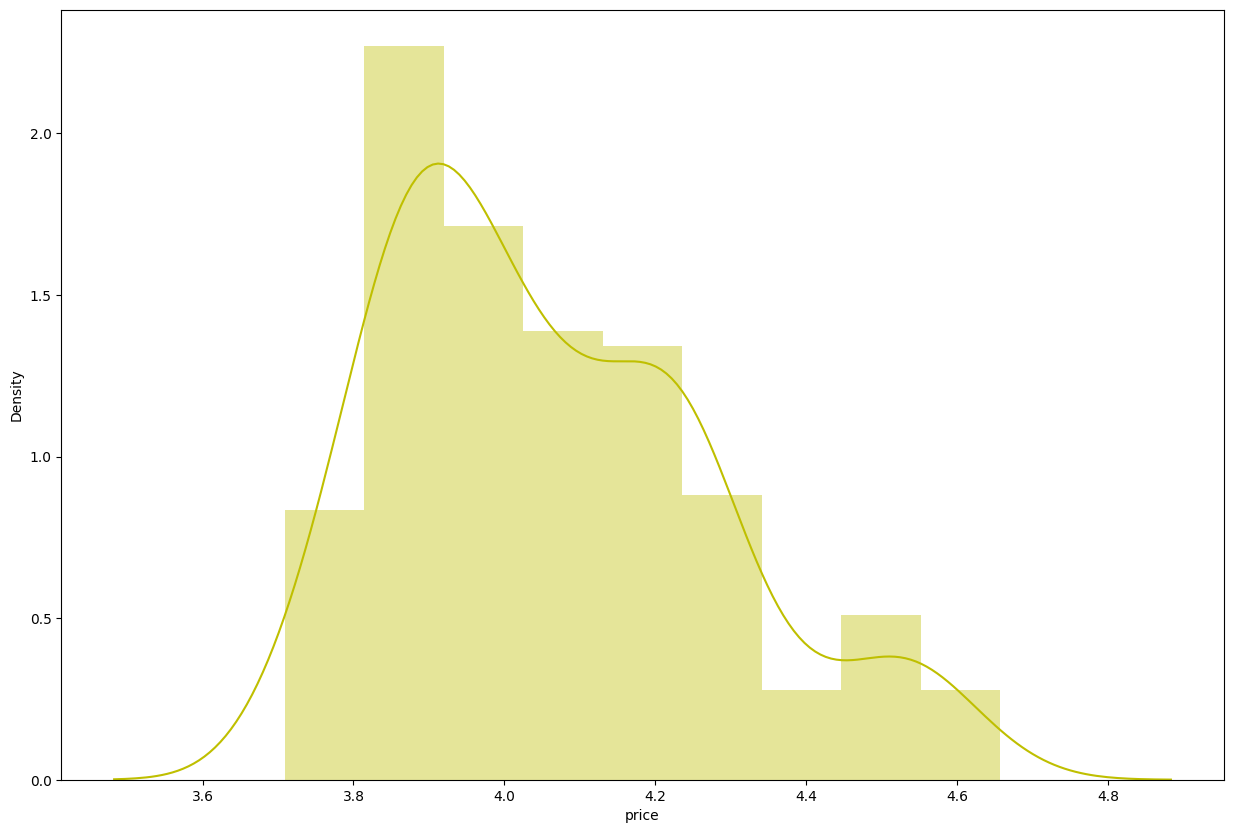

In [10]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['price']),color="y")

In [11]:
df.describe(include="O")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [12]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [13]:
df['gas']=np.where(df['fueltype']=='gas',1,0)
df['diesel']=np.where(df['fueltype']=='diesel',1,0)
df.drop(columns=['fueltype'],axis=1,inplace=True)

In [14]:
df['std']=np.where(df['aspiration']=='std',1,0)
df['turbo']=np.where(df['aspiration']=='turbo',1,0)
df.drop(columns=['aspiration'],axis=1,inplace=True)

In [15]:
df['four']=np.where(df['doornumber']=='four',1,0)
df['two']=np.where(df['doornumber']=='two',1,0)
df.drop(columns=['doornumber'],axis=1,inplace=True)

In [16]:
df['sedan']=np.where(df['carbody']=='sedan',1,0)
df['hatchback']=np.where(df['carbody']=='hatchback',1,0)
df['wagon']=np.where(df['carbody']=='wagon',1,0)
df['hardtop']=np.where(df['carbody']=='hardtop',1,0)
df['convertible']=np.where(df['carbody']=='convertible',1,0)
df.drop(columns=['carbody'],axis=1,inplace=True)

In [17]:
df['fwd']=np.where(df['drivewheel']=='fwd',1,0)
df['rwd']=np.where(df['drivewheel']=='rwd',1,0)
df['4wd']=np.where(df['drivewheel']=='4wd',1,0)
df.drop(columns=['drivewheel'],axis=1,inplace=True)

In [18]:
df['front']=np.where(df['enginelocation']=='front',1,0)
df['rear']=np.where(df['enginelocation']=='rear',1,0)
df.drop(columns=['enginelocation'],axis=1,inplace=True)

In [19]:
df['ohc']=np.where(df['enginetype']=='ohc',1,0)
df['ohcf']=np.where(df['enginetype']=='ohcf',1,0)
df['ohcv']=np.where(df['enginetype']=='ohcv',1,0)
df['dohc']=np.where(df['enginetype']=='dohc',1,0)
df['l']=np.where(df['enginetype']=='l',1,0)
df['rotor']=np.where(df['enginetype']=='rotor',1,0)
df['dohcv']=np.where(df['enginetype']=='dohcv',1,0)
df.drop(columns=['enginetype'],axis=1,inplace=True)

In [20]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [21]:
df['four']=np.where(df['cylindernumber']=='four',1,0)
df['six']=np.where(df['cylindernumber']=='six',1,0)
df['five']=np.where(df['cylindernumber']=='five',1,0)
df['eight']=np.where(df['cylindernumber']=='eight',1,0)
df['two']=np.where(df['cylindernumber']=='two',1,0)
df['three']=np.where(df['cylindernumber']=='three',1,0)
df['twelve']=np.where(df['cylindernumber']=='twelve',1,0)
df.drop(columns=['cylindernumber'],axis=1,inplace=True)

In [22]:
df['mpfi']=np.where(df['fuelsystem']=='mpfi',1,0)
df['2bbl']=np.where(df['fuelsystem']=='2bbl',1,0)
df['idi']=np.where(df['fuelsystem']=='idi',1,0)
df['1bbl']=np.where(df['fuelsystem']=='1bbl',1,0)
df['spdi']=np.where(df['fuelsystem']=='spdi',1,0)
df['4bbl']=np.where(df['fuelsystem']=='4bbl',1,0)
df['mfi']=np.where(df['fuelsystem']=='mfi',1,0)
df['spfi']=np.where(df['fuelsystem']=='spfi',1,0)
df.drop(columns=['fuelsystem'],axis=1,inplace=True)

In [23]:
df.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,three,twelve,mpfi,2bbl,idi,1bbl,spdi,4bbl,mfi,spfi
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,0,0,0,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,1,0,0,0,0,0,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,1,0,0,0,0,0,0,0


In [24]:
x=df.drop(columns=['price','CarName'],axis=1)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,mpfi,2bbl,idi,1bbl,spdi,4bbl,mfi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
y=df['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [26]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=1)

In [27]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,mpfi,2bbl,idi,1bbl,spdi,4bbl,mfi,spfi
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,...,0,0,1,0,0,0,0,0,0,0
90,1,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,21.9,...,0,0,0,0,1,0,0,0,0,0
147,0,97.0,173.5,65.4,53.0,2455,108,3.62,2.64,9.0,...,0,0,1,0,0,0,0,0,0,0
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,...,0,0,1,0,0,0,0,0,0,0
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,99.1,186.6,66.5,56.1,2695,121,3.54,3.07,9.3,...,0,0,1,0,0,0,0,0,0,0
137,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,...,0,0,1,0,0,0,0,0,0,0
72,3,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,...,0,0,1,0,0,0,0,0,0,0
140,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,...,0,0,0,1,0,0,0,0,0,0


In [28]:
x_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,mpfi,2bbl,idi,1bbl,spdi,4bbl,mfi,spfi
78,2,93.7,157.3,64.4,50.8,2004,92,2.97,3.230,9.4,...,0,0,0,1,0,0,0,0,0,0
97,1,94.5,170.2,63.8,53.5,2037,97,3.15,3.290,9.4,...,0,0,0,1,0,0,0,0,0,0
151,1,95.7,158.7,63.6,54.5,2040,92,3.05,3.030,9.0,...,0,0,0,1,0,0,0,0,0,0
44,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.110,9.6,...,0,0,0,1,0,0,0,0,0,0
40,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.580,9.0,...,0,0,0,0,0,1,0,0,0,0
67,-1,110.0,190.9,70.3,56.5,3515,183,3.58,3.640,21.5,...,0,0,0,0,1,0,0,0,0,0
98,2,95.1,162.4,63.8,53.3,2008,97,3.15,3.290,9.4,...,0,0,0,1,0,0,0,0,0,0
18,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.030,9.5,...,1,0,0,1,0,0,0,0,0,0
152,1,95.7,158.7,63.6,54.5,2015,92,3.05,3.030,9.0,...,0,0,0,1,0,0,0,0,0,0
62,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.390,8.6,...,0,0,0,1,0,0,0,0,0,0


In [29]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_test

array([[0.8       , 0.20699708, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.2303207 , 0.40314961, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.26530612, 0.22204724, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25364431, 0.38425197, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.69606299, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.20699708, 0.19370079, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
regressor.intercept_

17062.566199879828

In [33]:
regressor.coef_

array([   579.80754017,   2735.41840824,  -8795.43214233,  10554.51408964,
         1580.45705443,   9281.39617655,  31196.67317369,  -4896.39839552,
        -7992.90733636, -12682.66120289,  -1309.54793329,   3471.83425164,
        -7192.25150942,   7033.40424807,  -3692.57379751,   3692.57379751,
         -748.21244972,    748.21244972,  -1850.15258299,   2030.11398703,
          524.43899968,   -827.79434307,   -515.48481125,  -1111.044127  ,
         1929.88428164,   -503.01215647,   1286.52922726,   -783.51707079,
        -5398.58390315,   5398.58390315,   3213.15642999,   2411.8208812 ,
        -3785.81609103,    915.08476316,  -1775.93169146,   2030.11398703,
        -3008.4282789 ,   -369.83597834,  -1831.18558175,   5284.07695799,
            0.        ,  -3263.01680195,   -323.25994757,   -563.84013055,
         3692.57379751,   -579.97952693,  -3088.49645529,   2030.11398703,
            0.        ,  -1167.11172421])

In [34]:
y_pred=regressor.predict(x_test)

In [35]:
y_predd=regressor.predict(x_train)

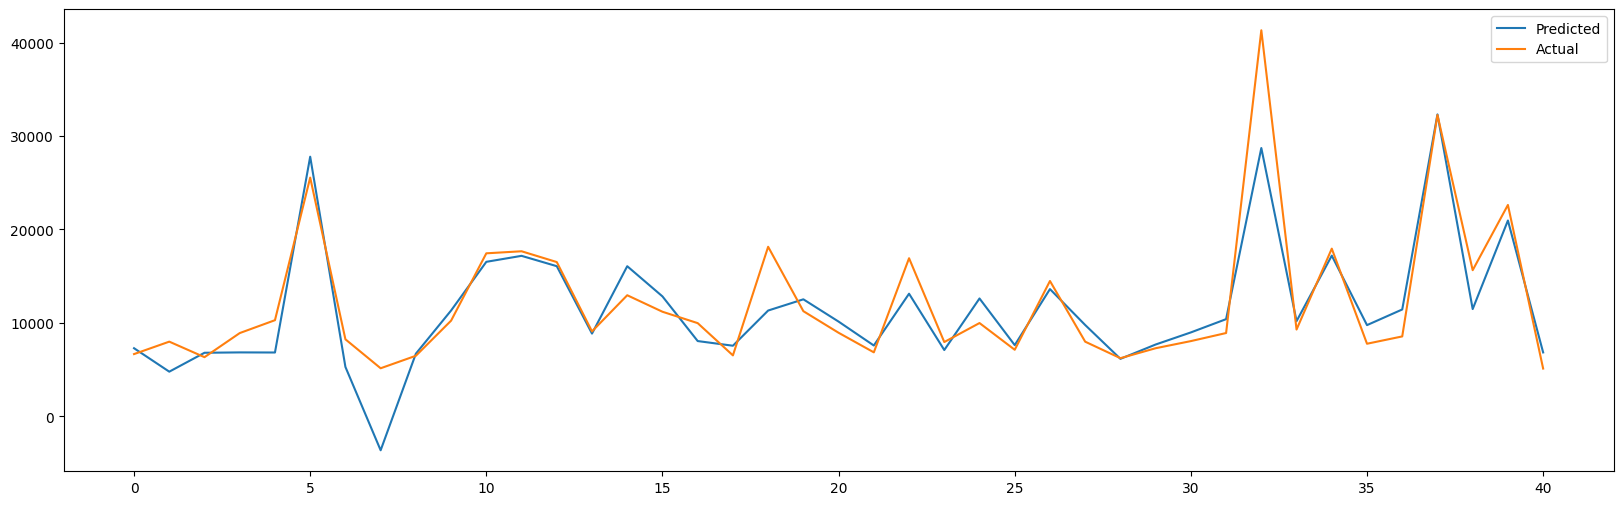

In [36]:
plt.figure(figsize=(20,6))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

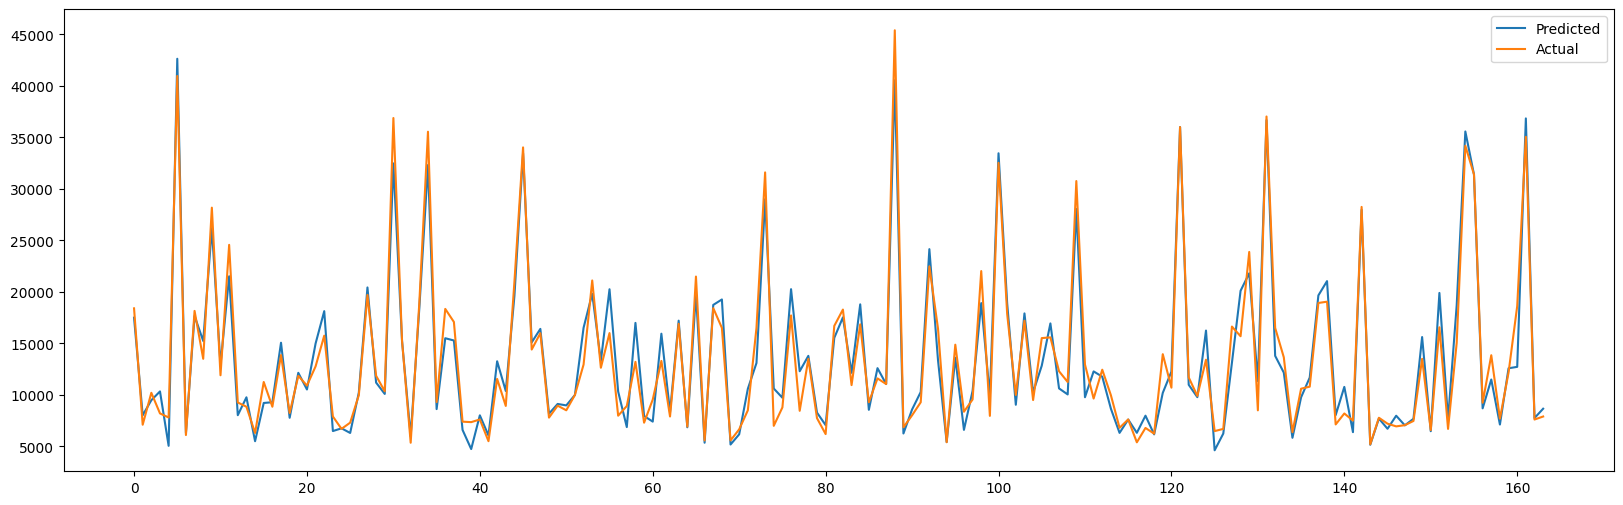

In [37]:
plt.figure(figsize=(20,6))
plt.plot((y_predd))
plt.plot((np.array(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [38]:
r2_score(y_test,y_pred)

0.8168808660064921

In [39]:
r2_score(y_train,y_predd)

0.9492302972619396

In [40]:
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

different alpha values: [   10   100  1000 10000]


In [41]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


In [42]:
ridge_weight = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(x_train, y_train)
    ridge_weight.append(ridge.coef_)

In [43]:
ridge_weight

[array([  457.89389501,  1443.52608135,  1519.65123161,  2982.55783607,
          233.873312  ,  2856.12067063,  3443.61360298,  1267.72607726,
         -204.5431876 ,   170.87955998,  2626.60729705,  -150.39446564,
        -1287.90373051, -1219.69524453,  -329.84501061,   329.84501061,
         -355.37072331,   355.37072331, -4173.04297554,  -583.9218686 ,
          -27.15798296, -1252.06559965, -1159.8294095 ,  1026.99501226,
         1412.05797986, -1330.344805  ,  1924.83265516,  -594.48785016,
        -2056.79767384,  2056.79767384,   598.91993587,   816.59634043,
          672.01778059,  -697.62453584, -1143.79668291,  -583.9218686 ,
          337.80903046,   260.47601564,   438.77301696,  3368.67961256,
            0.        ,   689.03619899,   953.13337998,  -536.26715672,
          329.84501061,   168.65453267,  -166.88383775,  -583.9218686 ,
            0.        ,  -164.56006019]),
 array([    9.14507964,   557.99649467,   700.32002491,  1016.48144322,
           96.34820432

In [44]:
def weight_versus_alpha_plot(weight, alphas):

    fig = plt.figure(figsize = (8, 6))


    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)


    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

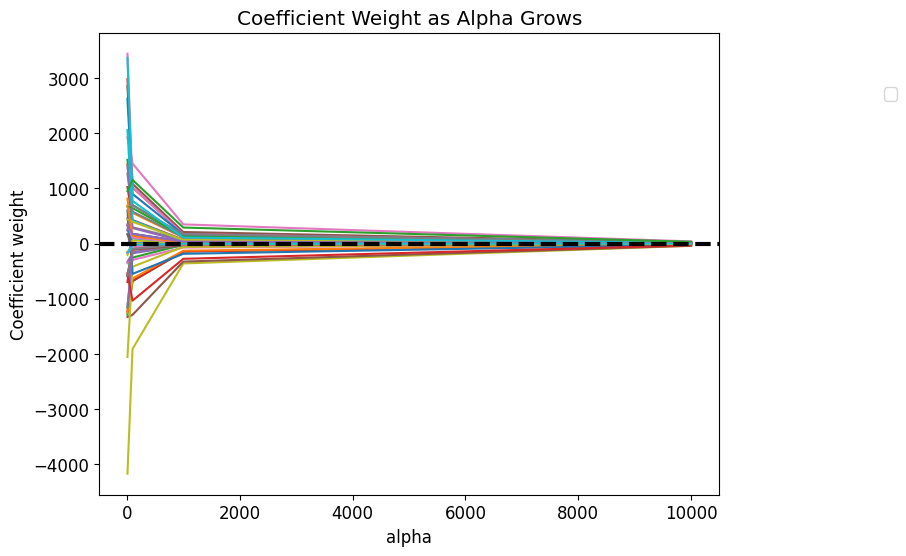

In [45]:

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas)